<a href="https://colab.research.google.com/github/anurag-code/dependency_ranking_algo_for-dags/blob/main/Dependency_Rank_for_the_DAGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependency rank for DAGs:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

class dependencyRank:

  def __init__(self,df,meta = {'iteration_no':[],'val_sum':[]},counter=0) -> None:
    self.df=df
    self.meta=meta
    self.counter=counter

  def check(self,max=50, min=10):
    # to check circular dependency, if there are ore than max iterations.
    # max value could be calculated based on certain percentage of total number of parent objects.
    # However, to make it simple we have taken it as 50.
    # Minimum (min) number of iterations are taken to be 10.

    if self.counter == max:
      assert self.counter <50, 'Too many iterations: Please check for circular dependencies'

    elif self.counter <= min:
      return True

    else:
      return (self.meta['val_sum'][self.counter-1] != self.meta['val_sum'][self.counter-5])


  def rank(self, created_from='created_from'):
    self.df['initial_seq']= self.df['object'].apply(lambda x:0)

    # get full list of objects
    # list of parent objects in created from
    li1 = list(set([j for i in list(self.df[created_from]) for j in i]))
    # list of child objects
    li2 = list(set(list(self.df['object'])))
    full_list= list(set(li1+li2))

    # create dictionary of nodes with initial values, which will get updated iteratively
    md=dict(zip(full_list,[0]*len(full_list)))

    # map values as per md in df. This will be updated itertively
    self.df['iter_seq']=self.df['object'].apply(lambda x:md[x])

    # create list of dependencies in numeric form for each node
    self.df['created_from_pointed'] = self.df[created_from].apply(lambda x: [md[i] for i in x])

    # run a while loop till the sum of the numbers of md becomes constant.
    print('\nStart Iterations\n')
    while self.check():
      self.meta['iteration_no'].append(self.counter)
      for i in range(len(self.df)):
        for j in range(len(self.df)):
          if self.df.loc[i,'object'] in self.df.loc[j,created_from]:
            if max(self.df.loc[j,'created_from_pointed'])<=md[self.df.loc[i,'object']]:
              md[self.df.loc[j,'object']]=max(self.df.loc[j,'created_from_pointed'])+1
          else:
            continue
      # sum of values in nth iteration
      self.meta['val_sum'].append(sum(md.values()))

      print('iteration_number: ',self.counter,'sum_of_values: ', self.meta['val_sum'][self.counter])

      # update iteration sequence to compare it with initial sequence. Update after both the loops above are finished
      self.df['iter_seq']=self.df['object'].apply(lambda x: md[x])
      # update created_from_pointed based on new md.
      self.df['created_from_pointed']=self.df[created_from].apply(lambda x: [ md[i] for i in x ])
      # increase the counter for next while loop
      self.counter = self.counter+1

    print('\nIterations END\n')

    return self.df


  def plot_iter_val_graph(self):
    meta_data=pd.DataFrame(self.meta)
    sns.lineplot(data=meta_data, x='iteration_no',y='val_sum')
    plt.show(block=False)

In [5]:
# prompt: create a dataframe with two columns: one column with name as 'object' , which is object name such as A,B,C.. and the second column is the list of objects on which the 'object ' is dependent or created from. Lets us assume that the second column name is 'created_from'. Could you please create this dataframe considering we dont have any circular dependency

df = pd.DataFrame({'object': ['A', 'B', 'C', 'D', 'E'],
                   'created_from': [['B', 'C'], ['F'], ['D'], ['F'], ['A', 'B']]})


In [6]:
df

,object,created_from
0,A,"[B, C]"
1,B,[F]
2,C,[D]
3,D,[F]
4,E,"[A, B]"


In [9]:
rank_=dependencyRank(df)
r=rank_.rank()


Start Iterations

iteration_number:  0 sum_of_values:  3
iteration_number:  1 sum_of_values:  5
iteration_number:  2 sum_of_values:  6
iteration_number:  3 sum_of_values:  6
iteration_number:  4 sum_of_values:  6
iteration_number:  5 sum_of_values:  6
iteration_number:  6 sum_of_values:  6
iteration_number:  7 sum_of_values:  6
iteration_number:  8 sum_of_values:  6
iteration_number:  9 sum_of_values:  6
iteration_number:  10 sum_of_values:  6

Iterations END



In [10]:
r

,object,created_from,initial_seq,iter_seq,created_from_pointed
0,A,"[B, C]",0,2,"[0, 1]"
1,B,[F],0,0,[0]
2,C,[D],0,1,[0]
3,D,[F],0,0,[0]
4,E,"[A, B]",0,3,"[2, 0]"


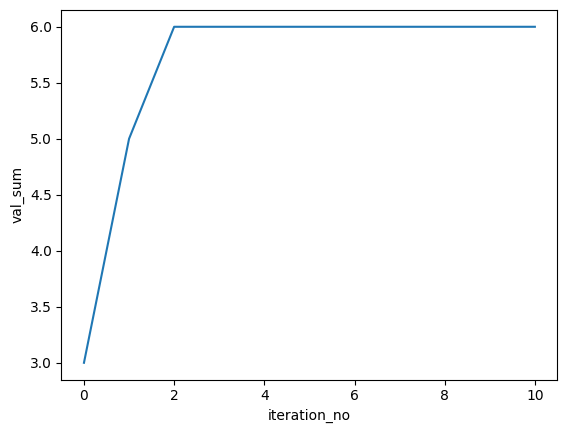

In [11]:
rank_.plot_iter_val_graph()